# Interactive "Sidekick" Laser Demo

## References:
1. [Interactive Plot](https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets)

In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import epics
from epics import PV
from time import sleep

jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [2]:
epics.caget("TEENSYDIODE:trace:yarr")

array([133, 228, 240, 245, 245, 242, 242, 241, 243, 236, 242, 240, 241,
       237, 238, 238, 234, 237, 235, 234, 570, 705, 730, 720, 729, 316,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

<IPython.core.display.Javascript object>


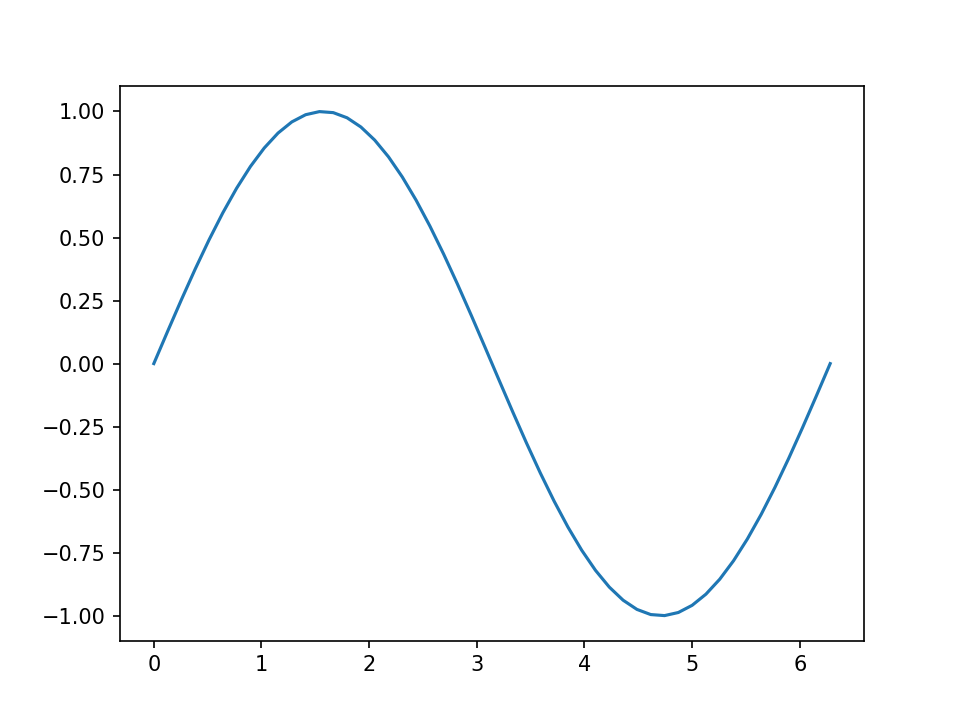

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [4]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

<IPython.core.display.Javascript object>


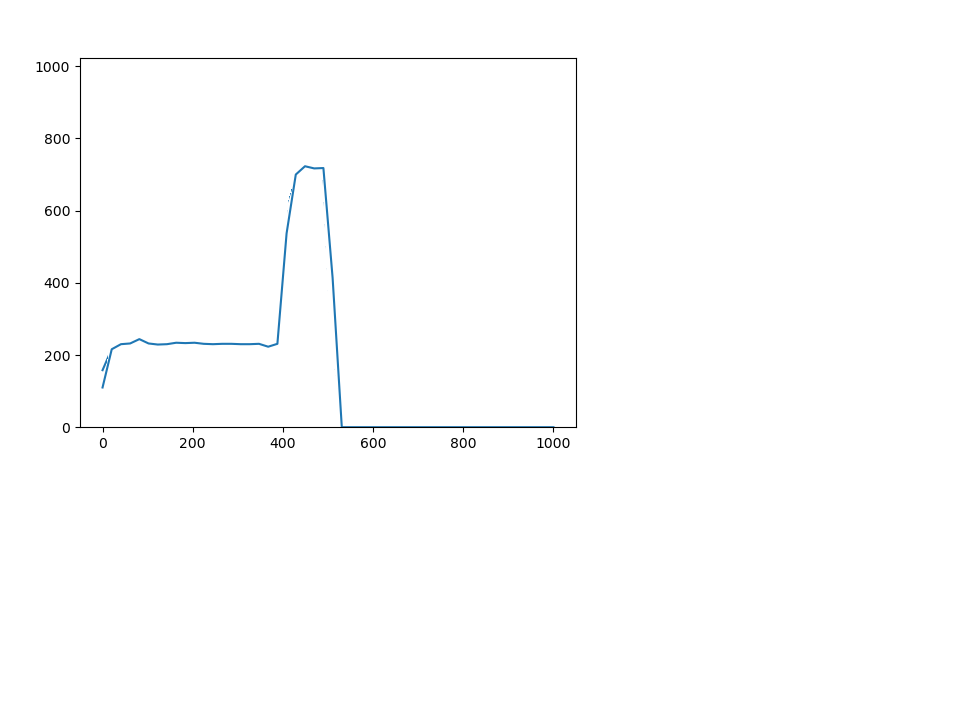

KeyboardInterrupt: 

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim([0, 1024])
line, = ax.plot(np.linspace(0, 1000), epics.caget("TEENSYDIODE:trace:yarr"))

while True:
    line.set_ydata(epics.caget("TEENSYDIODE:trace:yarr"))
    fig.canvas.draw()

In [ ]:
def f1(reprate):
    epics.caput("TEENSYPULSE:reprate:set", reprate)

def f2(reprate):
    epics.caput("TEENSYPULSE:reprate:set", reprate)

interact(f1, reprate=(1,30));

In [ ]:
epics.caget("TEENSYPULSE:reprate")

In [ ]:
reprate.put(20)

In [7]:
epics.caput("TEENSYPULSE:reprate:set", 5)

1